<a href="https://colab.research.google.com/github/sakhawat3003/Financial-Data-Analysis/blob/main/Financial_Data_Analysis_by_Md_Sakhawat_Hossen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the requisite modules/packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Import the excel data sheet with historical vendor payment data

In [ ]:
data=pd.read_excel('Vendor Pay History.xlsx')
data.head(5)

,Contractor,Client Invoice WO,WO Type,NC,Client Disc. Total,Client OAF Fee,Sent to Client Date,Invoice Status in Client portal,Remarks - At cost/client invoice status,WO in PPW,...,Who is Accountable?,Issue Catagory,Vnedor Qc Wk,QC'd By,Card Number / V. Payment Confirmation Number,Vendor Paid by,Transaction Date,PPW,Month,AP Days
0,Debra Mayberry,T0030760741,Bid Approval,8925,6675.12,NaN,2023-12-28,NaN,NaN,T0030760741,...,NaN,NaN,1,Warner,471723258,Warner,2024-01-03,Evergreen,1,6
1,Debra Mayberry,NaN,NaN,NaN,NaN,NaN,2023-12-28,NaN,NaN,NaN,...,NaN,NaN,1,Warner,471723258,Warner,2024-01-03,Evergreen,1,6
2,Donnie Peden,T0030728153,Inspection,8925,18.00,NaN,2023-12-29,1.9 Stop Coded/Reassigned/WO not found/Cancell...,NaN,T0030728153,...,NaN,NaN,52,Warner,472425584,Warner,2024-01-08,Evergreen,1,10
3,Donnie Peden,T0030733165,Inspection,8925,18.00,NaN,2023-12-29,1.9 Stop Coded/Reassigned/WO not found/Cancell...,NaN,T0030733165,...,NaN,NaN,52,Warner,472425584,Warner,2024-01-08,Evergreen,1,10
4,Donnie Peden,T0030770609,Inspection,8925,18.00,NaN,2023-12-29,1.9 Stop Coded/Reassigned/WO not found/Cancell...,NaN,T0030770609,...,NaN,NaN,52,Warner,472425584,Warner,2024-01-08,Evergreen,1,10


## check the number of columns and rows in the dataset

In [ ]:
data.shape

(3003, 33)

In [ ]:
data.columns

Index(['Contractor', 'Client Invoice WO', 'WO Type', 'NC',
       'Client Disc. Total', 'Client OAF Fee', 'Sent to Client Date',
       'Invoice Status in Client portal',
       'Remarks - At cost/client invoice status', 'WO in PPW',
       'Address/ Details', 'State', 'Material Purchase / Remittance Amount',
       'Primary Invoice', 'Adjustment Amount', 'Ontime/ Late Fee',
       'Vendor OAF', 'Additional Approval', 'Late Status',
       'Comments to Vendor / Fraudulance / Repetative issue', 'QC'd Status',
       'V. OAF/ Addtl. Approved by', 'Saved Amount - V. Adjustment',
       'Who is Accountable?', 'Issue Catagory', 'Vnedor Qc Wk', 'QC'd By',
       'Card Number / V. Payment Confirmation Number', 'Vendor Paid by',
       'Transaction Date', 'PPW', 'Month', 'AP Days'],
      dtype='object')

## Drop the columns I don't need

In [ ]:
data.drop(columns=['Client OAF Fee','Invoice Status in Client portal','Remarks - At cost/client invoice status',\
                   'Address/ Details','State',\
                  'Ontime/ Late Fee','Late Status','Comments to Vendor / Fraudulance / Repetative issue',"QC'd Status",\
                  'V. OAF/ Addtl. Approved by','Who is Accountable?','Issue Catagory',\
                  'Card Number / V. Payment Confirmation Number','Vendor Paid by',], inplace=True)

In [ ]:
data.columns

Index(['Contractor', 'Client Invoice WO', 'WO Type', 'NC',
       'Client Disc. Total', 'Sent to Client Date', 'WO in PPW',
       'Material Purchase / Remittance Amount', 'Primary Invoice',
       'Adjustment Amount', 'Vendor OAF', 'Additional Approval',
       'Saved Amount - V. Adjustment', 'Vnedor Qc Wk', 'QC'd By',
       'Transaction Date', 'PPW', 'Month', 'AP Days'],
      dtype='object')

## Rename columns with suitable short names

In [ ]:
data.rename(columns={'Client Invoice WO':'Client WO','Client Disc. Total':'Client Payment',\
                     'Material Purchase / Remittance Amount':'Vendor Payment',\
                     'Saved Amount - V. Adjustment':'Saved Amount','Vnedor Qc Wk':'QC week',\
                    "QC'd By":'Checked By'}, inplace=True)

In [ ]:
data.columns

Index(['Contractor', 'Client WO', 'WO Type', 'NC', 'Client Payment',
       'Sent to Client Date', 'WO in PPW', 'Vendor Payment', 'Primary Invoice',
       'Adjustment Amount', 'Vendor OAF', 'Additional Approval',
       'Saved Amount', 'QC week', 'Checked By', 'Transaction Date', 'PPW',
       'Month', 'AP Days'],
      dtype='object')

## Delete the rows for which there is no WO(N/A) in the ppw

In [ ]:
data.dropna(subset=['WO in PPW'], inplace=True)

In [ ]:
data.shape

(2972, 19)

In [ ]:
data.head(5)

,Contractor,Client WO,WO Type,NC,Client Payment,Sent to Client Date,WO in PPW,Vendor Payment,Primary Invoice,Adjustment Amount,Vendor OAF,Additional Approval,Saved Amount,QC week,Checked By,Transaction Date,PPW,Month,AP Days
0,Debra Mayberry,T0030760741,Bid Approval,8925,6675.12,2023-12-28,T0030760741,555.61,555.61,NaN,NaN,NaN,NaN,1,Warner,2024-01-03,Evergreen,1,6
2,Donnie Peden,T0030728153,Inspection,8925,18.00,2023-12-29,T0030728153,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,10
3,Donnie Peden,T0030733165,Inspection,8925,18.00,2023-12-29,T0030733165,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,10
4,Donnie Peden,T0030770609,Inspection,8925,18.00,2023-12-29,T0030770609,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,10
5,Jerry Rhinehart,1061192897,Misc Work Type,8902,18.75,2023-12-30,1061192897,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,9


## Save the dataset as csv

In [ ]:
data.to_csv('Vendor Payment History.csv', index=False) #index is false to prevent saving row numbers as a column in the csv file

## Load the csv file to see if that has been saved correctly

In [ ]:
data_saved=pd.read_csv('Vendor Payment History.csv')
data_saved.head()

,Contractor,Client WO,WO Type,NC,Client Payment,Sent to Client Date,WO in PPW,Vendor Payment,Primary Invoice,Adjustment Amount,Vendor OAF,Additional Approval,Saved Amount,QC week,Checked By,Transaction Date,PPW,Month,AP Days
0,Debra Mayberry,T0030760741,Bid Approval,8925,6675.12,2023-12-28,T0030760741,555.61,555.61,NaN,NaN,NaN,NaN,1,Warner,2024-01-03,Evergreen,1,6
1,Donnie Peden,T0030728153,Inspection,8925,18.00,2023-12-29,T0030728153,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,10
2,Donnie Peden,T0030733165,Inspection,8925,18.00,2023-12-29,T0030733165,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,10
3,Donnie Peden,T0030770609,Inspection,8925,18.00,2023-12-29,T0030770609,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,10
4,Jerry Rhinehart,1061192897,Misc Work Type,8902,18.75,2023-12-30,1061192897,20.00,20.00,NaN,NaN,NaN,NaN,52,Warner,2024-01-08,Evergreen,1,9


In [ ]:
data=data_saved

## How many WOs have been checked by Cooper?

In [ ]:
data[data['Checked By']=='Cooper'].shape

(1910, 19)

## Total sum of the vendor payment checked by Cooper

In [ ]:
data[data['Checked By']=='Cooper']['Vendor Payment'].sum()

235041.88

## Average account payable(AP) for the vendors

In [ ]:
data['AP Days'].mean()

12.543741588156124

## Density plot of AP days for the vendors within the range of 0-50 days.
## It is centered around 10-12 days which means most of the vendors are paid within 10-12
## days on average

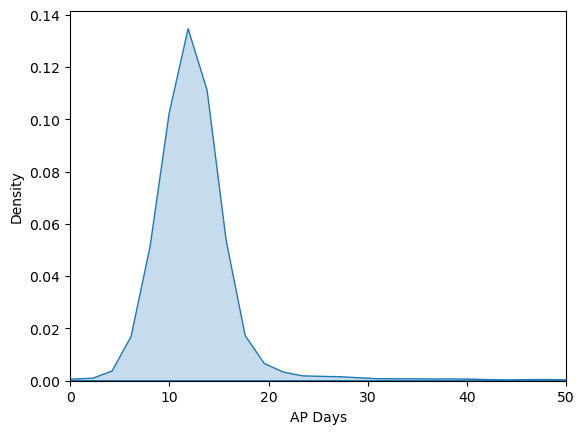

In [ ]:
sns.kdeplot(data['AP Days'], fill=True)
plt.xlim(0,50);

## For 80% of the WOs vendors are paid within 14 days.

In [ ]:
data['AP Days'].quantile(0.80)

14.0

## Find the frequency of the different types of WOs

In [ ]:
data['WO Type'].value_counts()

Grass Recut                              937
Bid Approval                             776
Inspection                               187
Bid Request                              182
Initial Grass Cut                        171
Initial Secure                           155
Securing                                 140
Misc Work Type                           102
Exterior Maintenance                      56
Winterization                             56
Snow Removal                              54
Initial Services                          30
Maid Refresh                              25
Eviction                                  17
Code Violation Bid                        13
Correction Work                           10
Initial REO Service                        6
Meet & Greet                               6
Final Secure                               6
Violation Bid                              5
Initial Sales Clean                        5
Re-Secure                                  4
Rush Tenan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Contractor           2972 non-null   object 
 1   Client WO            2971 non-null   object 
 2   WO Type              2970 non-null   object 
 3   NC                   2971 non-null   object 
 4   Client Payment       2954 non-null   float64
 5   Sent to Client Date  2963 non-null   object 
 6   WO in PPW            2972 non-null   object 
 7   Vendor Payment       2972 non-null   float64
 8   Primary Invoice      2972 non-null   float64
 9   Adjustment Amount    74 non-null     float64
 10  Vendor OAF           321 non-null    float64
 11  Additional Approval  34 non-null     float64
 12  Saved Amount         53 non-null     float64
 13  QC week              2972 non-null   int64  
 14  Checked By           2972 non-null   object 
 15  Transaction Date     2972 non-null   o

## Saved amount by Cooper, Anthony, and Warner

In [ ]:
data[data['Checked By']=='Cooper']['Saved Amount'].sum()

2234.5

In [ ]:
data[data['Checked By']=='Anthony']['Saved Amount'].sum()

30.0

In [ ]:
data[data['Checked By']=='Warner']['Saved Amount'].sum()

1567.5

## Change the "sent to client date" column in to datetime object

In [ ]:
data['Sent to Client Date']=pd.to_datetime(data['Sent to Client Date'], format='%Y-%m-%d', errors='coerce')

## We can also change multiple date columns in to datetime using the apply function

In [ ]:
data[['Sent to Client Date','Transaction Date']]=data[['Sent to Client Date','Transaction Date']].\
                                                    apply(pd.to_datetime,format='%Y-%m-%d', errors='coerce')


In [ ]:
data[['Sent to Client Date','Transaction Date']].head(5)

,Sent to Client Date,Transaction Date
0,2023-12-28,2024-01-03
1,2023-12-29,2024-01-08
2,2023-12-29,2024-01-08
3,2023-12-29,2024-01-08
4,2023-12-30,2024-01-08


## Get the number of WOs completed by each contractor/vendor

In [ ]:
data['Contractor'].value_counts().head(10) #showing only the first 10 contractor with the most WOs

Jerry Rhinehart      604
Mark Howell          423
David Brockington    185
Steve Moody          154
Frederick Davis      136
Rasheed Hansford     115
Charlie Fuller       111
Mark Hinkle          108
Ventera Spence       105
Audra Claffey         79
Name: Contractor, dtype: int64

## Find the total amount of oaf provided to each vendor in descending order

In [ ]:
data[['Vendor OAF']].groupby(data['Contractor']).sum().sort_values(['Vendor OAF'], ascending=False).head(10)

,Vendor OAF
Contractor,
Charlie Fuller,5838.0
Donnie Peden,2095.0
Steve Moody,1940.0
David Brockington,1590.0
Ventera Spence,1050.0
Frederick Davis,852.0
Nicholas Sangster,540.0
Jeff Scarpino,430.0
Alexander Buskirk,400.0


## Find the average oaf or oaf per WO for each of the vendors

In [ ]:
data[['Vendor OAF']].groupby(data['Contractor']).mean().sort_values(['Vendor OAF'], ascending=False).head(10)

,Vendor OAF
Contractor,
DAYURIS PENAFUERTE,200.000000
Tracy Ann Allen,160.000000
Donnie Peden,139.666667
Nicholas Sangster,135.000000
Dave Isley,100.000000
Robert Combs,100.000000
Paul Turner,80.000000
Paul Penley,80.000000
Jeff Scarpino,71.666667


### But this does not seem right. Just look at the average oaf for Donnie Peden, it's staggering 139 per WO!!! something is wrong. First we can manually find out the actual average. We will find the total amount of oaf provided to donnie peden and the total number of WO he completed. Then simply divide total oaf by total WO. We will get the actual average.

In [ ]:
data[data['Contractor']=='Donnie Peden'].shape[0] # number of total WO by donnie peden

62

In [ ]:
data[data['Contractor']=='Donnie Peden']['Vendor OAF'].sum() # total oaf for donnie peden

2095.0

In [ ]:
2095/62 #average oaf for donnie peden

33.79032258064516

### We can see actual average oaf for donnie peden is 33 not 139. So what went wrong? Actually the 'Vendor OAF' column contains a lot of N/A values for no input which are actually zero oaf for the vendors.

In [ ]:
data['Vendor OAF'].isnull().sum() #total number of N/A values

2651

### We have to replace these N/A values with zero. Then finally we can calculate the true average oaf

In [ ]:
data['Vendor OAF'].fillna(0, inplace=True)
data['Vendor OAF'].isnull().sum()

0

### Now re-run the previous code again and see if it returns the actual average oaf now

In [ ]:
data[['Vendor OAF']].groupby(data['Contractor']).mean().sort_values(['Vendor OAF'], ascending=False).head(10)

,Vendor OAF
Contractor,
Tracy Ann Allen,160.000000
DAYURIS PENAFUERTE,100.000000
Robert Combs,100.000000
Charlie Fuller,52.594595
Nicholas Sangster,41.538462
Donnie Peden,33.790323
Jeff Scarpino,33.076923
Duwayney Loney,20.000000
Dave Isley,20.000000


### yep! that's right.

### Replace/fill all the N/A values with zero for specific columns

In [ ]:
data[['Client Payment','Vendor Payment','Adjustment Amount','Vendor OAF', 'Additional Approval',
      'Saved Amount']]=data[['Client Payment','Vendor Payment','Adjustment Amount','Vendor OAF', 'Additional Approval',
      'Saved Amount']].fillna(0)

In [ ]:
data['Vendor Payment'].isnull().sum()

0

### The preprocessed data is saved in a csv file. Let's load this data

In [ ]:
data=pd.read_csv('Vendor Payment Accounting Data.csv')

In [ ]:
data.head(5)

,Contractor,Client WO,WO Type,NC,Client Payment,Sent to Client Date,WO in PPW,Vendor Payment,Primary Invoice,Adjustment Amount,Vendor OAF,Additional Approval,Saved Amount,QC week,Checked By,Transaction Date,PPW,Month,AP Days
0,Debra Mayberry,T0030760741,Bid Approval,8925,6675.12,2023-12-28,T0030760741,555.61,555.61,0.0,0.0,0.0,0.0,1,Warner,2024-01-03,Evergreen,1,6
1,Donnie Peden,T0030728153,Inspection,8925,18.00,2023-12-29,T0030728153,20.00,20.00,0.0,0.0,0.0,0.0,52,Warner,2024-01-08,Evergreen,1,10
2,Donnie Peden,T0030733165,Inspection,8925,18.00,2023-12-29,T0030733165,20.00,20.00,0.0,0.0,0.0,0.0,52,Warner,2024-01-08,Evergreen,1,10
3,Donnie Peden,T0030770609,Inspection,8925,18.00,2023-12-29,T0030770609,20.00,20.00,0.0,0.0,0.0,0.0,52,Warner,2024-01-08,Evergreen,1,10
4,Jerry Rhinehart,1061192897,Misc Work Type,8902,18.75,2023-12-30,1061192897,20.00,20.00,0.0,0.0,0.0,0.0,52,Warner,2024-01-08,Evergreen,1,9


### Everytime we load the dataset, we need to convert the date columns into datetime for pandas

In [ ]:
data[['Sent to Client Date','Transaction Date']]=data[['Sent to Client Date','Transaction Date']].\
                                                    apply(pd.to_datetime,format='%Y-%m-%d', errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Contractor           2972 non-null   object        
 1   Client WO            2971 non-null   object        
 2   WO Type              2970 non-null   object        
 3   NC                   2971 non-null   object        
 4   Client Payment       2972 non-null   float64       
 5   Sent to Client Date  2963 non-null   datetime64[ns]
 6   WO in PPW            2972 non-null   object        
 7   Vendor Payment       2972 non-null   float64       
 8   Primary Invoice      2972 non-null   float64       
 9   Adjustment Amount    2972 non-null   float64       
 10  Vendor OAF           2972 non-null   float64       
 11  Additional Approval  2972 non-null   float64       
 12  Saved Amount         2972 non-null   float64       
 13  QC week              2972 non-nul

In [ ]:
#total client payment based on each client
data[['Client Payment']].groupby(data['NC']).sum().sort_values(['Client Payment'], ascending=False).head(10)

,Client Payment
NC,
8925,449912.60
8902,93355.97
8922,77786.92
8935,18250.56
8916,11689.47
8919,6329.26
4425,6281.24
8913,6201.08
8903,4023.05


### Find the two top most vendors for each of the clients based on vendor payment. It's a little difficult though.

In [ ]:
#group by clients and vendors. NC stands for National Clients
client_vendor_grouped=data.groupby(['NC','Contractor'], as_index=False)['Vendor Payment'].sum()

In [ ]:
client_vendor_grouped.head(5)

,NC,Contractor,Vendor Payment
0,3114,Tracy Ann Allen,810.0
1,3119,Paul Penley,20.0
2,3125,Paul Turner,220.0
3,3525,David Brockington,450.0
4,4402,Marvin Cooper,67.5


In [ ]:
# sort the grouped data. We need to sort the data by clients as well to maintain the serial of the clients
# All the clients are sorted and also all the vendors in each client are sorted in descending order.
sorted_data=client_vendor_grouped.sort_values(['NC','Vendor Payment'], ascending=[False,False])
sorted_data.head(5)

,NC,Contractor,Vendor Payment
164,CC78,Seth Broussard,794.0
163,CC31,Jerry Rhinehart,35.0
162,8942,Aliyah Dupree,390.0
161,8940,Seth Broussard,20.0
144,8935,Brandon Roussell,3371.5


In [ ]:
# top 2 vendors for each client
top_two=sorted_data.groupby(['NC']).head(2)

In [ ]:
top_two

,NC,Contractor,Vendor Payment
164,CC78,Seth Broussard,794.00
163,CC31,Jerry Rhinehart,35.00
162,8942,Aliyah Dupree,390.00
161,8940,Seth Broussard,20.00
144,8935,Brandon Roussell,3371.50
154,8935,Rasheed Hansford,2316.00
125,8925,Mark Howell,50159.80
132,8925,Rasheed Hansford,24722.45
86,8922,Jerry Rhinehart,13888.20
88,8922,Joshua Snipes,9180.11


### Top 10 vendors with highest payment per WO

In [ ]:
data.groupby(['Contractor'])[['Vendor Payment']].mean().sort_values(['Vendor Payment'], ascending=False).head(10)

,Vendor Payment
Contractor,
Samantha Poppiti,1906.000000
Tracy Ann Allen,810.000000
Joshua Snipes,726.854615
Debra Mayberry,555.610000
Vance Cobb,449.166667
3P-CANDID HOME INSPECTIONS LLC,435.000000
3P-J G Carpentry,362.500000
Jp handyman srv,350.000000
Robert Combs,311.000000


### Look at the WOs of the highest average paid vendor "Samantha Poppiti"

In [ ]:
data[data['Contractor']=='Samantha Poppiti']

,Contractor,Client WO,WO Type,NC,Client Payment,Sent to Client Date,WO in PPW,Vendor Payment,Primary Invoice,Adjustment Amount,Vendor OAF,Additional Approval,Saved Amount,QC week,Checked By,Transaction Date,PPW,Month,AP Days
2129,Samantha Poppiti,463408645-LO,Eviction,8916,2240.0,2024-07-05,463408645-LO,1535.0,1535.0,0.0,0.0,0.0,0.0,27,Cooper,2024-07-09,Evergreen,7,4
2652,Samantha Poppiti,29757,Inspection,8935,328.0,2024-08-09,29757,201.0,201.0,0.0,0.0,50.0,0.0,32,Cooper,2024-08-19,Evergreen,8,10
2793,Samantha Poppiti,463364287-LOA,Eviction,8916,5510.0,2024-08-16,463364287-LOA,3982.0,3982.0,0.0,0.0,0.0,0.0,34,Cooper,2024-09-04,Evergreen,9,19


## Time series analysis
### Plot the monthly client payment

In [ ]:
#setting the date as the index, a standard practice for time series analysis
data.set_index('Sent to Client Date', inplace=True)

In [ ]:
#sort the dataset by date order so all the WOs are in an ascending order of date
data.sort_index(inplace=True)

In [ ]:
#monthly client payment data
monthly_client_payment=data['Client Payment'].resample('M').sum()

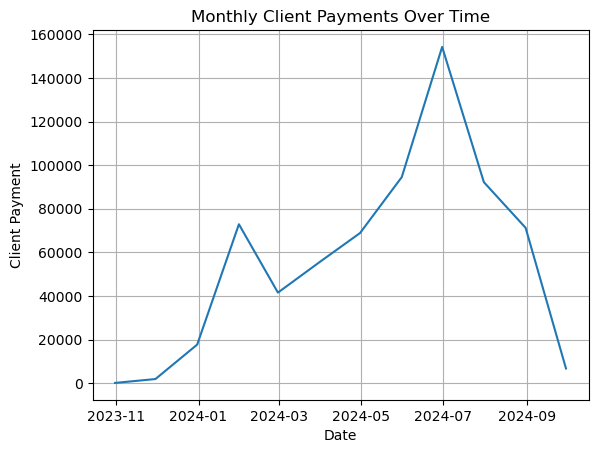

In [ ]:
#plot the monthly time series data for client payment
plt.plot(monthly_client_payment)
plt.title('Monthly Client Payments Over Time')
plt.xlabel('Date')
plt.ylabel('Client Payment')
plt.grid(True);

### Moving or rolling average

In [ ]:
moving_avg=monthly_client_payment.rolling(window=3).mean()

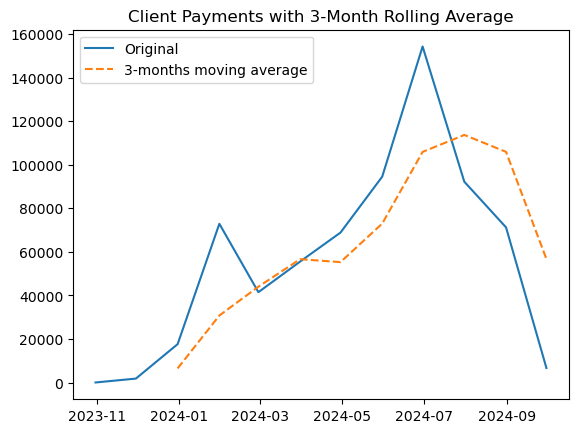

In [ ]:
plt.plot(monthly_client_payment, label='Original')
plt.plot(moving_avg, label='3-months moving average', linestyle='--')
plt.legend()
plt.title('Client Payments with 3-Month Rolling Average');

### Let's plot the weekly vendor payment data

In [ ]:
#set the transaction date as the date index
data.set_index('Transaction Date', inplace=True)

In [ ]:
#sort the data by date index
data.sort_index(inplace=True)

In [ ]:
#create the weekly vendor payment data
weekly_vendor_payment=data['Vendor Payment'].resample('W').sum()

In [ ]:
#total number of weeks
weekly_vendor_payment.size

38

In [ ]:
#vendor payment on the final week (38th)
weekly_vendor_payment.iloc[37]

4949.8

In [ ]:
weekly_vendor_payment.head(10)

Transaction Date
2024-01-07      584.44
2024-01-14     1320.56
2024-01-21    14587.20
2024-01-28    11494.60
2024-02-04     7439.20
2024-02-11     6663.82
2024-02-18     9756.00
2024-02-25     6998.65
2024-03-03     2429.70
2024-03-10     7023.40
Freq: W-SUN, Name: Vendor Payment, dtype: float64

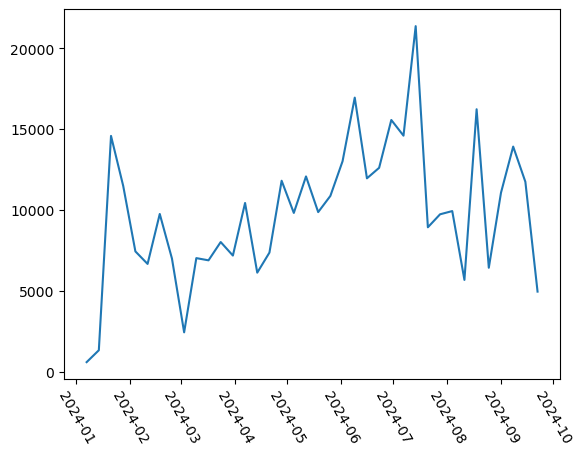

In [ ]:
#plot the weekly vendor payment data
plt.plot(weekly_vendor_payment)
plt.xticks(rotation=300); #rotate the date on the x-axis by 300 degree

### ADF test to check whether the weekly vendor payment data is stationary or non-stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#p-value for the adfuller test
adfuller(weekly_vendor_payment)[1]

0.0001125549213634792

#### As the p-value is much less than the 0.05, then we can consider our weekly vendor payment data as stationary

### We can fit ARIMA model for forecasting weekly vendor data. ARIMA model can only be fitted in a stationary time series data.
### There are 3 important parameters to fit an ARIMA model.  p (Auto-Regressive part) and q (Moving Average part) and d (differencing part). A simple starting point would be (p=1, d=0, q=1). Discuss with Cooper to know more about these parameters.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(weekly_vendor_payment, order=(1,0,1))
model_fit=model.fit()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


#### If the residuals are randomly distributed then we can say the ARIMA model is a good fit

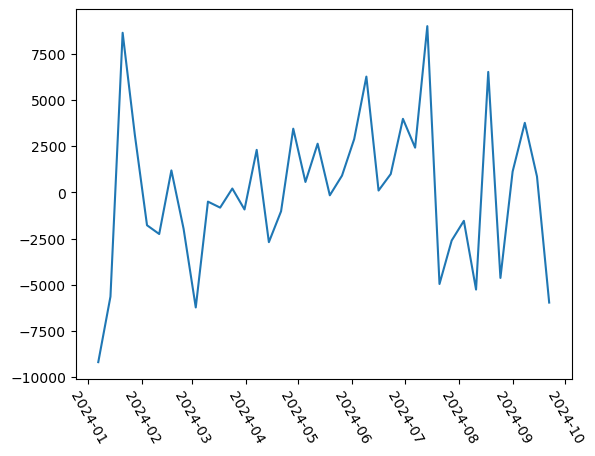

In [ ]:
residuals=model_fit.resid
plt.plot(residuals)
plt.xticks(rotation=300);

In [ ]:
forecast=model_fit.forecast(steps=15)

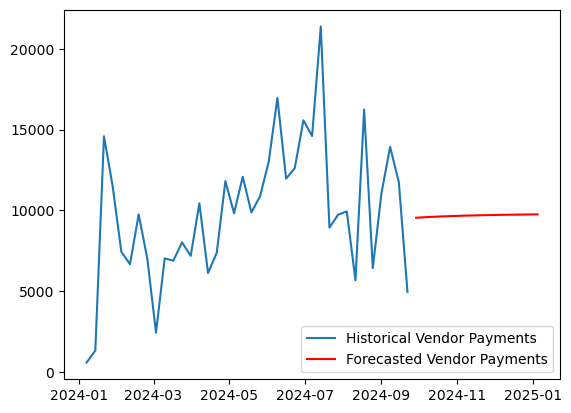

In [ ]:
plt.plot(weekly_vendor_payment, label='Historical Vendor Payments')
plt.plot(forecast, label='Forecasted Vendor Payments', color='red')
plt.legend();

#### Forecasted vendor payment for the next 10 weeks based on ARIMA model

In [ ]:
forecast

2024-09-29    9543.741704
2024-10-06    9574.839499
2024-10-13    9601.934177
2024-10-20    9625.541046
2024-10-27    9646.109081
2024-11-03    9664.029460
2024-11-10    9679.643008
2024-11-17    9693.246675
2024-11-24    9705.099187
2024-12-01    9715.425964
2024-12-08    9724.423409
2024-12-15    9732.262642
2024-12-22    9739.092757
2024-12-29    9745.043653
2025-01-05    9750.228510
Freq: W-SUN, Name: predicted_mean, dtype: float64

### Lets fit another type of ARIMA model (SARIMAX) for the data which may have inherent seasonality. For example our vendor payment data may contain seasonality.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_seasonality=SARIMAX(weekly_vendor_payment, order=(1,0,1), seasonal_order=(1,0,1,38)) #vendor payment data has 38 week
model_fit_seasonality=model_seasonality.fit()

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


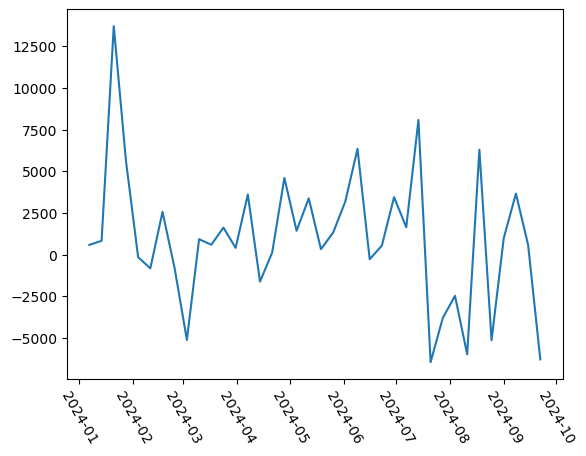

In [ ]:
residuals=model_fit_seasonality.resid
plt.plot(residuals)
plt.xticks(rotation=300);

In [ ]:
forecast_seasonality=model_fit_seasonality.forecast(steps=15)

#### Forecasted vendor payments for the next 15 weeks

In [ ]:
forecast_seasonality

2024-09-29    11494.114922
2024-10-06    11141.327036
2024-10-13     5639.088079
2024-10-20     6860.196960
2024-10-27     8477.191111
2024-11-03     8746.401575
2024-11-10     7426.366671
2024-11-17     8510.509644
2024-11-24    10339.365012
2024-12-01     8402.853841
2024-12-08     8410.672265
2024-12-15     7897.210079
2024-12-22     8193.143410
2024-12-29     6807.176489
2025-01-05     8532.441541
Freq: W-SUN, Name: predicted_mean, dtype: float64

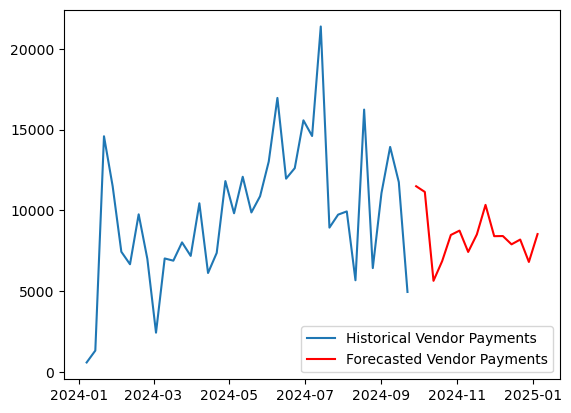

In [ ]:
plt.plot(weekly_vendor_payment, label='Historical Vendor Payments')
plt.plot(forecast_seasonality, label='Forecasted Vendor Payments', color='red')
plt.legend();

### It can be seen that the seasonal fit ARIMA model is better than the stationary fit ARIMA model

### Find the 95% confidence interval for the weekly vendor payment

In [ ]:
# our weekly vendor payment data has 38 weeks. So we can consider it as large sample data and apply the Z-distribution
# first we will calculate the mean and the standard deviation/error
mean=np.mean(weekly_vendor_payment)
std_error=stats.sem(weekly_vendor_payment)

In [ ]:
confidence_interval=stats.norm.interval(0.95, loc=mean, scale=std_error)
print(f"Mean: {mean}")
print(f"Confidence Interval: {confidence_interval}")

Mean: 9829.591052631578
Confidence Interval: (8448.594257359635, 11210.587847903522)
